# This project aims to predict whether a patient has a low or high risk of heart attack based on various medical features such as age, chest pain type, blood pressure, cholesterol, and more.

### Importing libraries

In [141]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Read Data from Data Set and pre-processing

In [142]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
print(df.shape) # we have 14 cols 11 of them is X and one of them is Y, and it has 303 lines
print("\n")
df.dtypes # check data types

(303, 14)




age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

***how many of each class is in our data set***

In [144]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [145]:
df.isnull().sum() # check for missing/null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [146]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Set

define feature set X:

In [147]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

***To use Scikit-learn we should convert pandas data frame to a Numpy array***

In [148]:
X = df [['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X[0:5]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


What are our Label

In [149]:
y = df['output'].values
y[0:5]

array([1, 1, 1, 1, 1])

### EDA

We use a heatmap to visualize the correlation between different features in the dataset.
It helps us identify which features are strongly or weakly related to the target variable (output).
Features with strong correlation (positive or negative) can be important for model training.

In [150]:
#Calculate the correlation matrix using the full DataFrame
corr_matrix = df.corr()

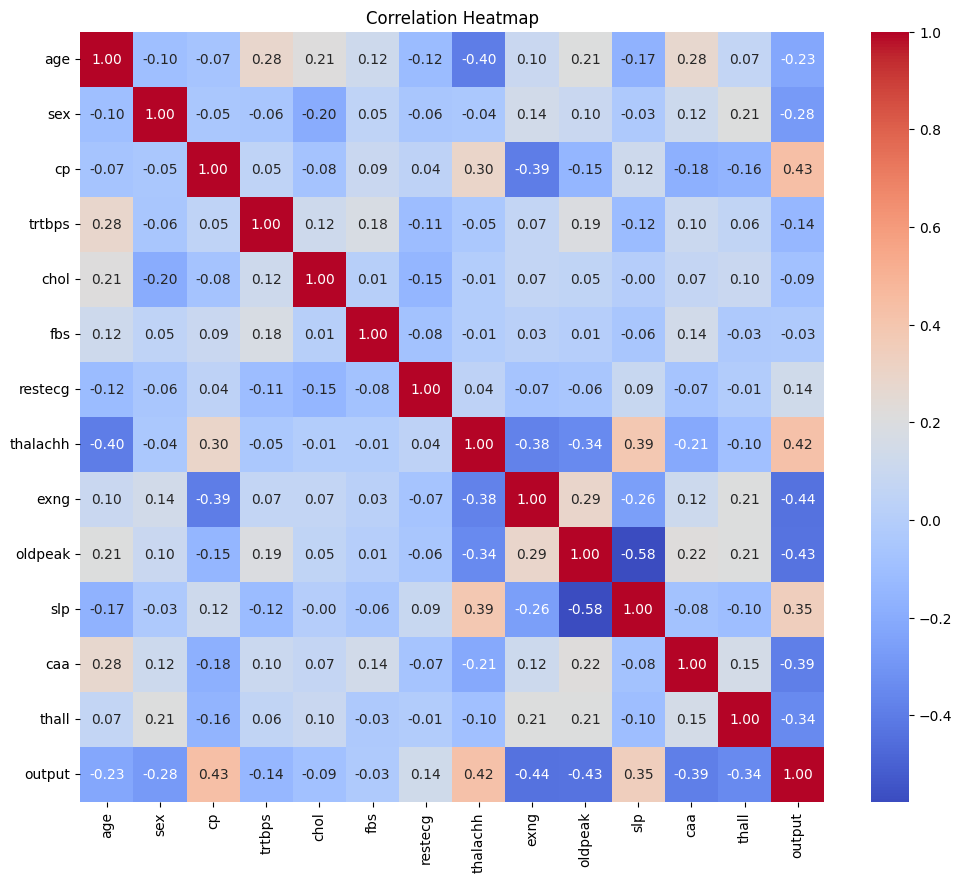

In [151]:
#plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the heatmap, the most important features correlated with the target (output) are:
- cp (chest pain type): +0.43
- thalachh (maximum heart rate): +0.42
- slp (slope of the ST segment): +0.35
- exng (exercise-induced angina): -0.43
- oldpeak (ST depression): -0.43
- ca (number of major vessels): -0.39
- thall (thalassemia): -0.34
Features with low correlation (e.g., age, chol, fbs) may have less impact on prediction.

### Preprocessing

***Select Features which are more Important***

In [152]:
selected_features = ['cp', 'thalachh', 'slp', 'exng', 'oldpeak', 'caa', 'thall']
X = df[selected_features]
y = df['output']

***Scaling***

In [153]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

### Train/Test

In [154]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 7) (242,)
Test set: (61, 7) (61,)


### Model Selection

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [156]:
y_pred = model.predict(X_test)

### Evaluation

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8852459016393442

Confusion Matrix:
 [[25  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



***We use the confusion matrix heatmap to visualize how well the model classifies each class,
showing true/false positives and negatives in a clear format.***

***We use the ROC curve to evaluate the model's ability to distinguish between the classes, especially focusing on how well it identifies positive cases.***

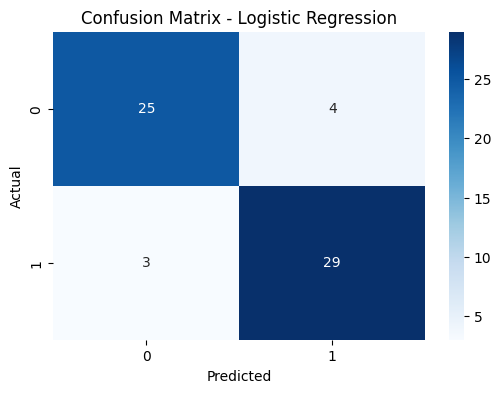

In [158]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC Score: 0.8976293103448276


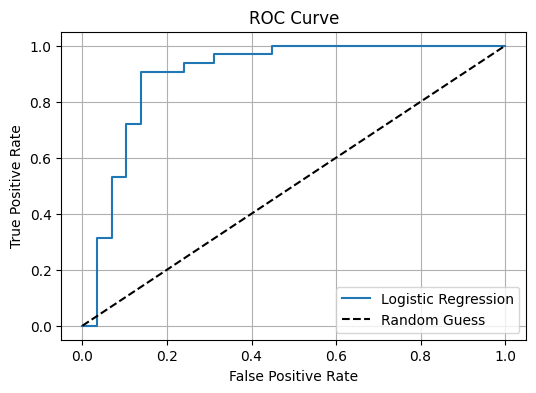

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

***Throughout this project, I evaluated multiple classification algorithms such as KNN, Random Forest, Decision Tree, and SVM. Among all, Logistic Regression delivered the best performance in terms of accuracy***

In [160]:
from sklearn.preprocessing import StandardScaler
sample = [[0, 170, 1, 0, 0.5, 0, 1]]  # exact same as GUI input
sample_scaled = scaler.transform(sample)
model.predict(sample_scaled)

array([1])